# KMeans
## Importing necessary libraries

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [126]:
df=pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


## Data visualization

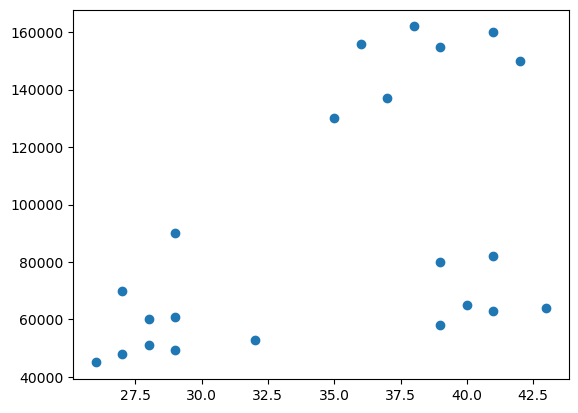

In [127]:
plt.scatter(df["Age"],df["Income($)"])
plt.show()

## kMeans model fit without sacling

In [128]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [129]:
y_pred=km.fit_predict(df[["Age","Income($)"]])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [130]:
df["cluster"]=y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


## Dividing data into different clusters made by KMeans

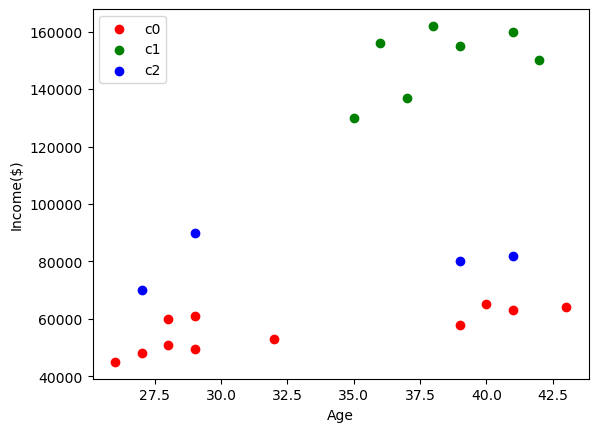

In [131]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1["Income($)"],color="r",label="c0")
plt.scatter(df2.Age,df2["Income($)"],color="g",label="c1")
plt.scatter(df3.Age,df3["Income($)"],color="b",label="c2")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()
plt.show()

### not good clustering b coz it is not scaled properly
## Using minmax scaler

In [132]:
scalar=MinMaxScaler()
scalar.fit(df[["Income($)"]])
df["Income($)"]=scalar.transform(df[["Income($)"]])
scalar.fit(df[["Age"]])
df["Age"]=scalar.transform(df[["Age"]])

In [133]:
y_pred=km.fit_predict(df[["Age","Income($)"]])
y_pred

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [134]:
df["cluster"]=y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [135]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

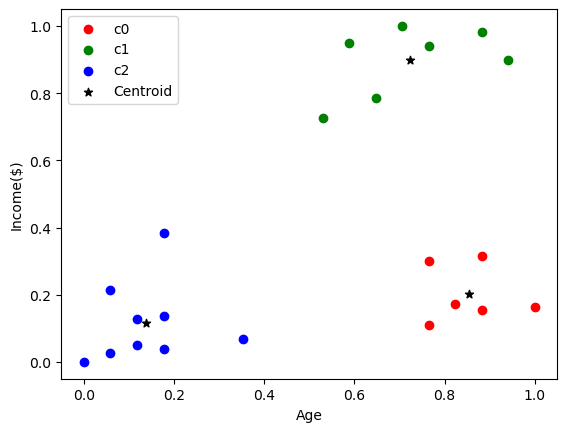

In [136]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1["Income($)"],color="r",label="c0")
plt.scatter(df2.Age,df2["Income($)"],color="g",label="c1")
plt.scatter(df3.Age,df3["Income($)"],color="b",label="c2")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="black",marker="*",label="Centroid")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()
plt.show()

## Calculation of sum of square error for each value of k

In [137]:
k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)

In [138]:
sse


[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.31317378535411056,
 0.24465688001790983,
 0.19234897613331944,
 0.17819099639701186,
 0.1507624152908512]

## Ploting k vs sum of square error

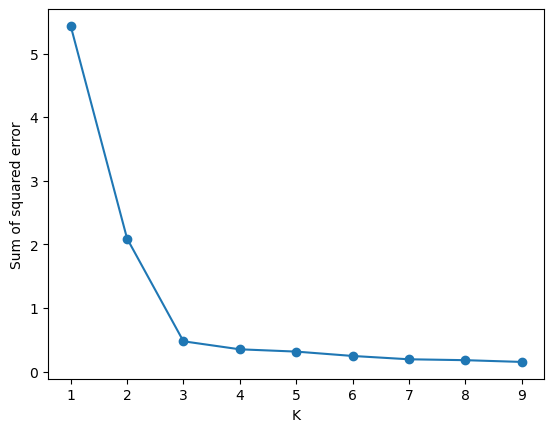

In [139]:
plt.plot(k_range,sse,marker="o")
plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.show()

## conclusion:- Elbow of graph is at k = 3 so number of cluster is 3